## Final Assignment: analyze a dataset

Acknowledgement: 
The dataset used in this analysis comes from [Kaggle](https://www.kaggle.com/bahramjannesarr/nobel-prize-from-1901-till-2020) and follows [Open Database Lincense](https://opendatacommons.org/licenses/odbl/1-0/).

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('nobel_final.csv')

In [6]:
data.head()

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44


In [4]:
data.shape

(923, 14)

In [7]:
data.isnull().sum()

firstname                  0
surname                    2
born_country_code          0
died_country_code        306
gender                     0
year                       0
category                   0
share                      0
name_of_university       226
city_of_university       231
country_of_university    230
born_month                 0
age                        0
age_get_prize              0
dtype: int64

Text(0.5, 0, 'Number of Noble prize winners.')

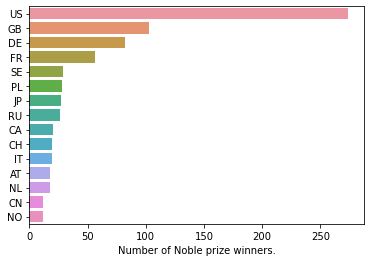

In [30]:
noble_by_country = data['born_country_code'].value_counts().to_frame()
noble_by_country = noble_by_country[:15]
sns.barplot(x = 'born_country_code', y = noble_by_country.index, data = noble_by_country)
plt.xlabel("Number of Noble prize winners.")

<AxesSubplot:xlabel='count', ylabel='category'>

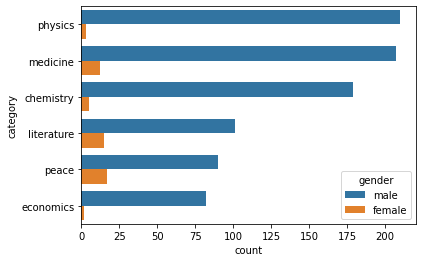

In [71]:
nobel_gender = data[['category', 'gender']].value_counts().to_frame().reset_index()
nobel_gender.columns = ['category', 'gender', 'count']
sns.barplot(y="category", x = "count", hue="gender", data=nobel_gender)

<AxesSubplot:xlabel='category', ylabel='Count'>

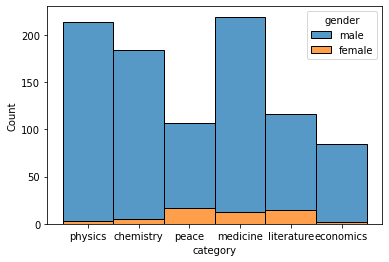

In [72]:
sns.histplot(binwidth=0.5, x="category", hue="gender", data=data, stat="count", multiple="stack")

<AxesSubplot:xlabel='count', ylabel='category'>

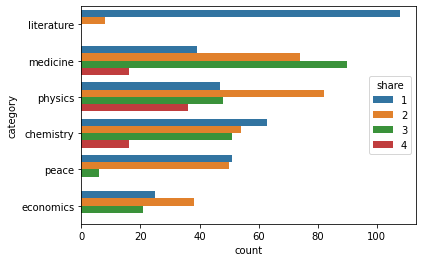

In [74]:
nobel_share = data[['category', 'share']].value_counts().to_frame().reset_index()
nobel_share.columns = ['category', 'share', 'count']
nobel_share
sns.barplot(y="category", x = "count", hue="share", data=nobel_share)

<AxesSubplot:ylabel='Frequency'>

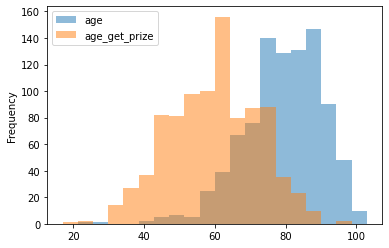

In [80]:
data[["age", "age_get_prize"]].plot.hist(bins = 20, alpha = 0.5)

In [85]:
# Hypothesis testing

from scipy.stats import binom
print (1-binom.cdf(54, 923, 0.5))
print (1-binom.cdf(869, 923, 0.5))

1.0
1.1102230246251565e-16


In [81]:
data['gender'].value_counts()

male      869
female     54
Name: gender, dtype: int64